# Analisando as vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print('Quantidade de linhas e colunas:', alucar.shape)


Quantidade de linhas e colunas: (24, 2)


In [5]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [6]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [9]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [10]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

     |████████████████████████████████| 215kB 21.9MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
print(sns.__version__)

0.9.0


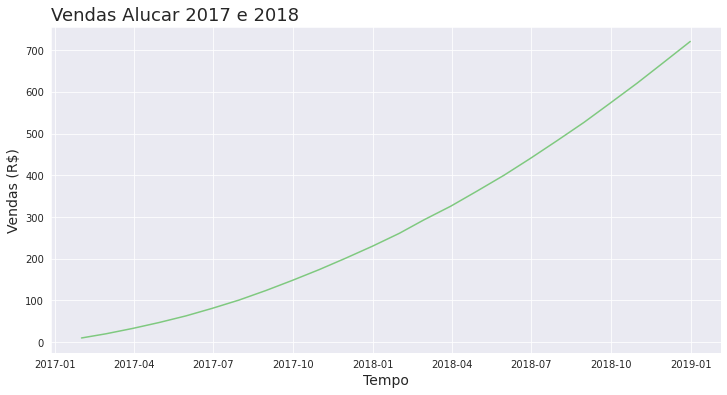

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [13]:
alucar['aumento'] = alucar['vendas'].diff()

In [14]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


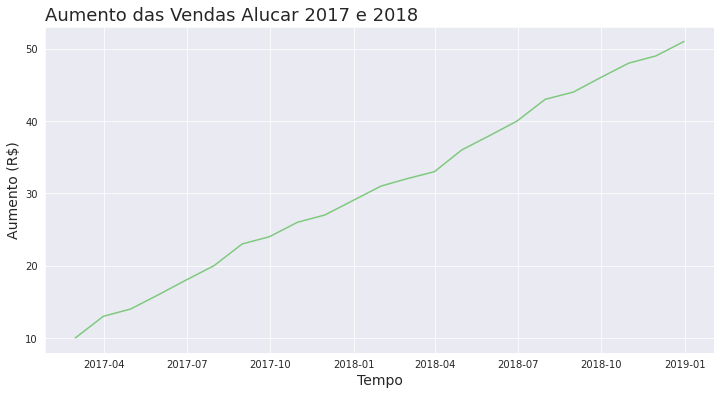

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax1 = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax1.figure.set_size_inches(12, 6)
ax1.set_title('Aumento das Vendas Alucar 2017 e 2018', loc = 'left', fontsize = 18)
ax1.set_xlabel('Tempo', fontsize = 14)
ax1.set_ylabel('Aumento (R$)', fontsize = 14)
ax1 = ax1

In [16]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

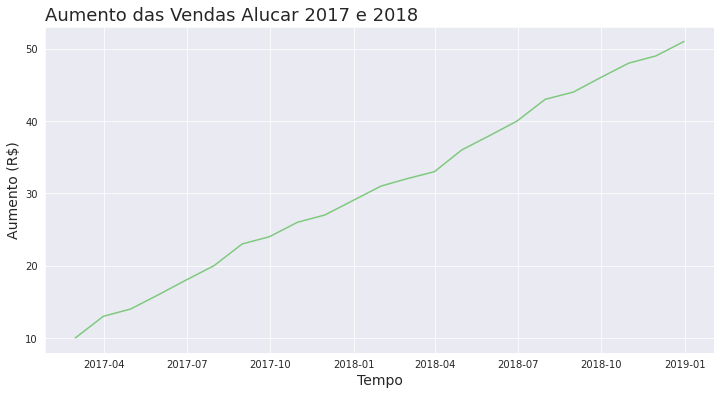

In [17]:
plotar('Aumento das Vendas Alucar 2017 e 2018', 'Tempo', 'Aumento (R$)', 'mes',  'aumento', alucar)

In [18]:
alucar['aceleracao'] = alucar['aumento'].diff()

In [19]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


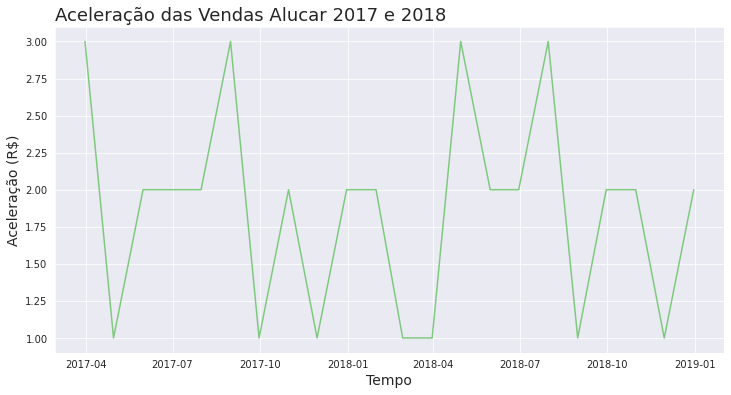

In [20]:
plotar('Aceleração das Vendas Alucar 2017 e 2018', 'Tempo', 'Aceleração (R$)', 'mes',  'aceleracao', alucar)

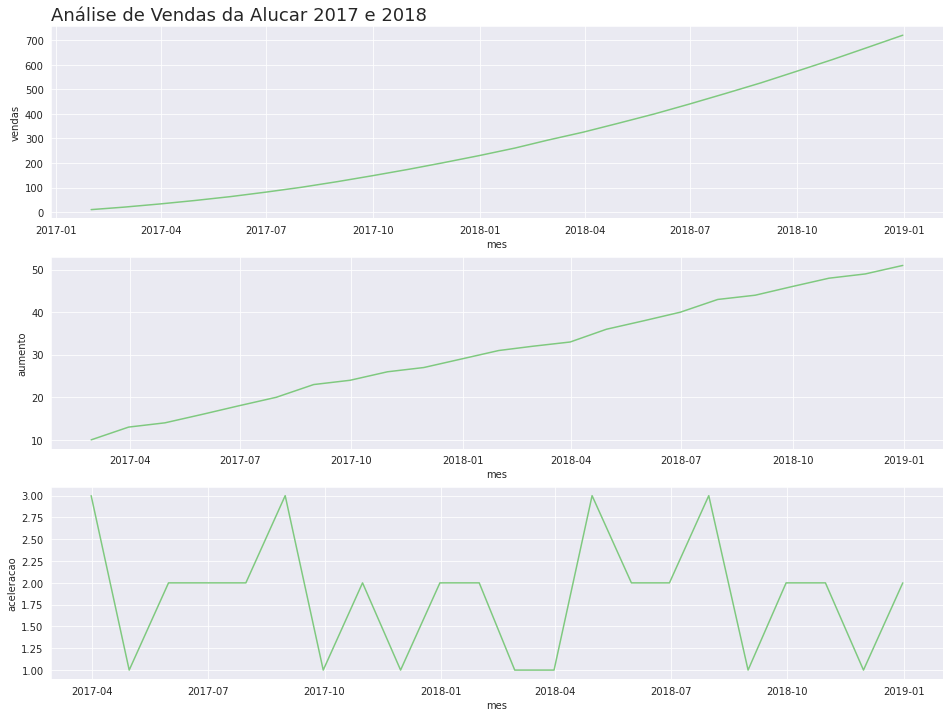

In [21]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de Vendas da Alucar 2017 e 2018',loc = 'left', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [22]:
def plot_comparacao(titulo, x, y1, y2, y3, dataset):
  plt.figure(figsize = (16, 12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo,loc = 'left', fontsize = 18)
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x = x, y = y3, data = dataset)

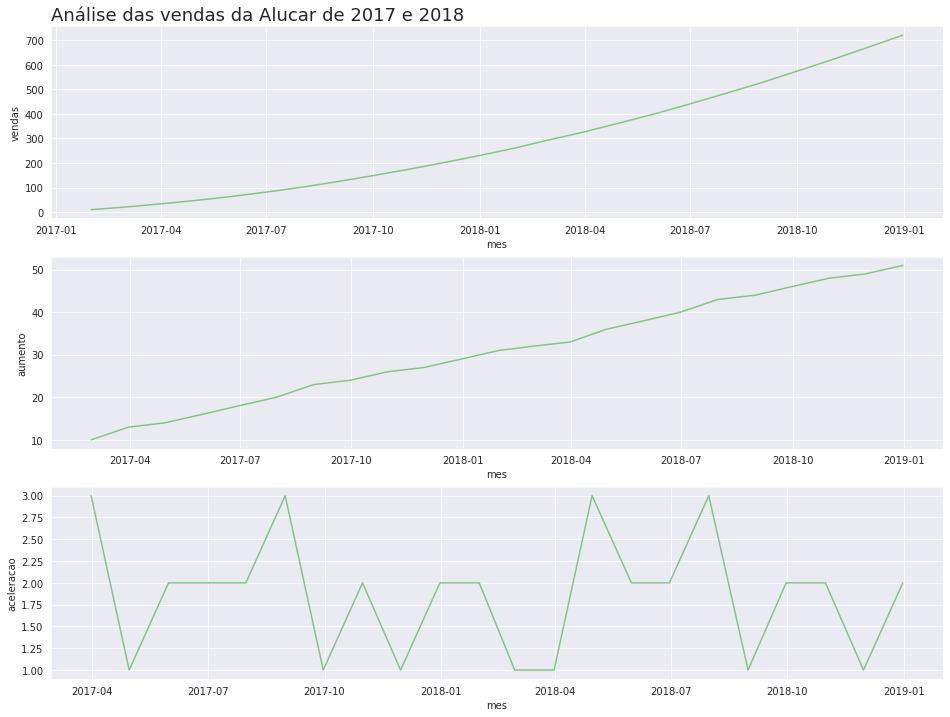

In [23]:
plot_comparacao('Análise das vendas da Alucar de 2017 e 2018', 'mes', 'vendas', 'aumento', 'aceleracao', alucar)

In [24]:
from pandas.plotting import autocorrelation_plot

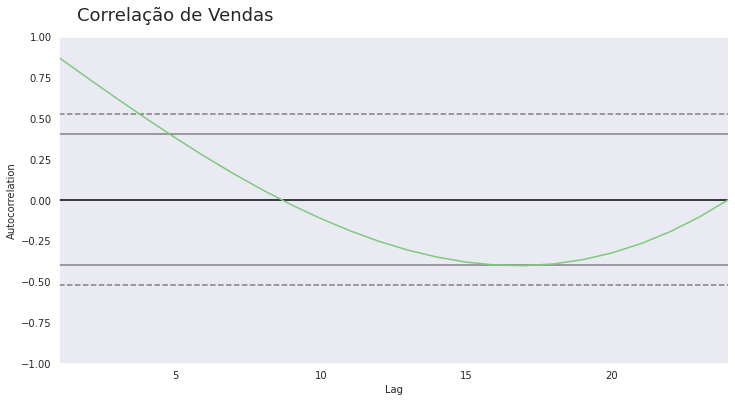

In [25]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação de Vendas', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

**Alta correlação nos 7 primeiro dias**

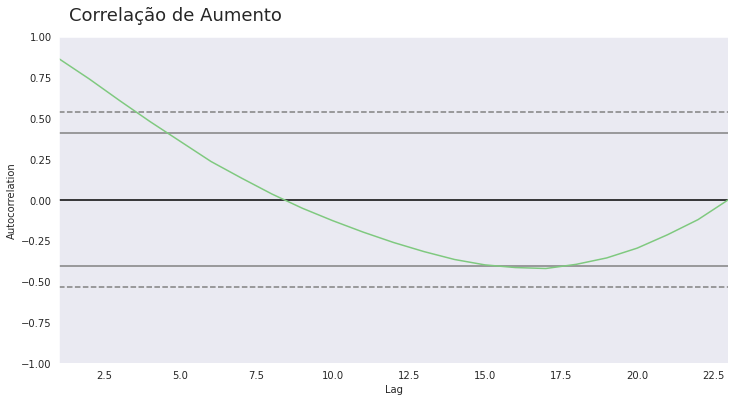

In [26]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação de Aumento', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

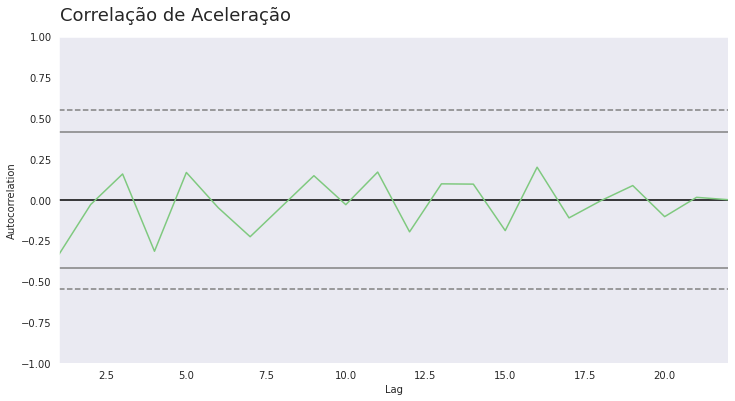

In [27]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação de Aceleração', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

Autocorrelação	Interpretação
1	              correlação perfeita positiva
0,7 a 0,9	      correlação forte
0,4 a 0,7	      correlação moderada
0,2 a 0,4	      correlação fraca
0	              correlação nula
< 0	            correlação negativa
-1	            correlação perfeita negativa

# Analisando Assinantes da Newsletter

In [28]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [29]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [30]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [31]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [32]:
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   mes         24 non-null     datetime64[ns]
 1   assinantes  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [33]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [34]:
assinantes['aumento'] = assinantes['assinantes'].diff()

In [35]:
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [36]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


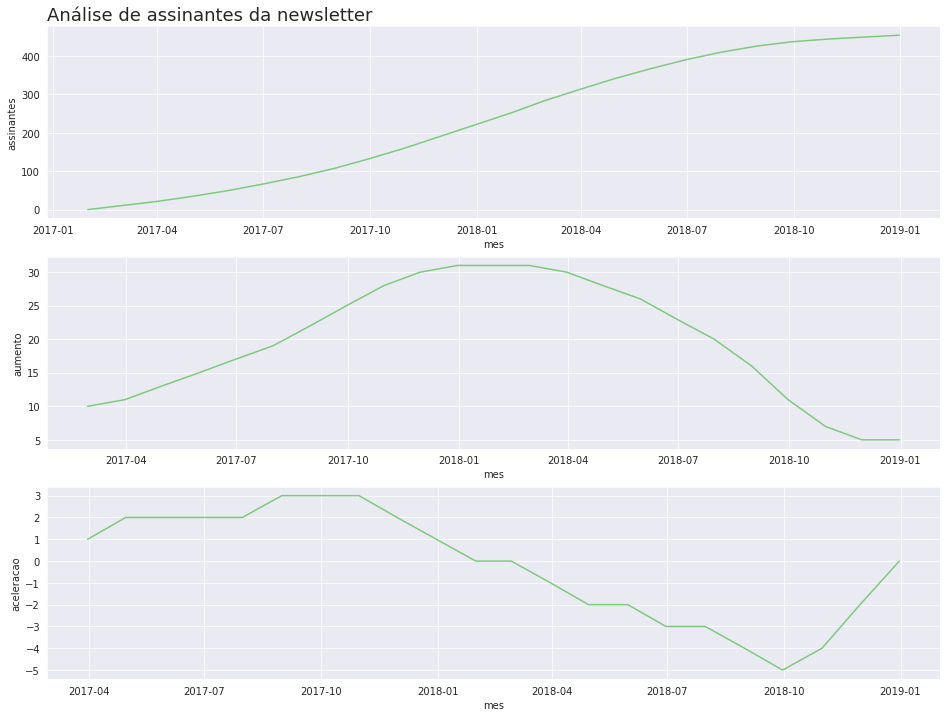

In [37]:
plot_comparacao('Análise de assinantes da newsletter', 'mes', 'assinantes', 'aumento','aceleracao', assinantes)

# Análise das vendas - Chocolura

In [38]:
chocolura = pd.read_csv('chocolura.csv')  

In [39]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [40]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [41]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [42]:
print('Quantidade de linhas e colunas:', chocolura.shape)
print('Quantidade de dados nulos: ', chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos:  0


In [43]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


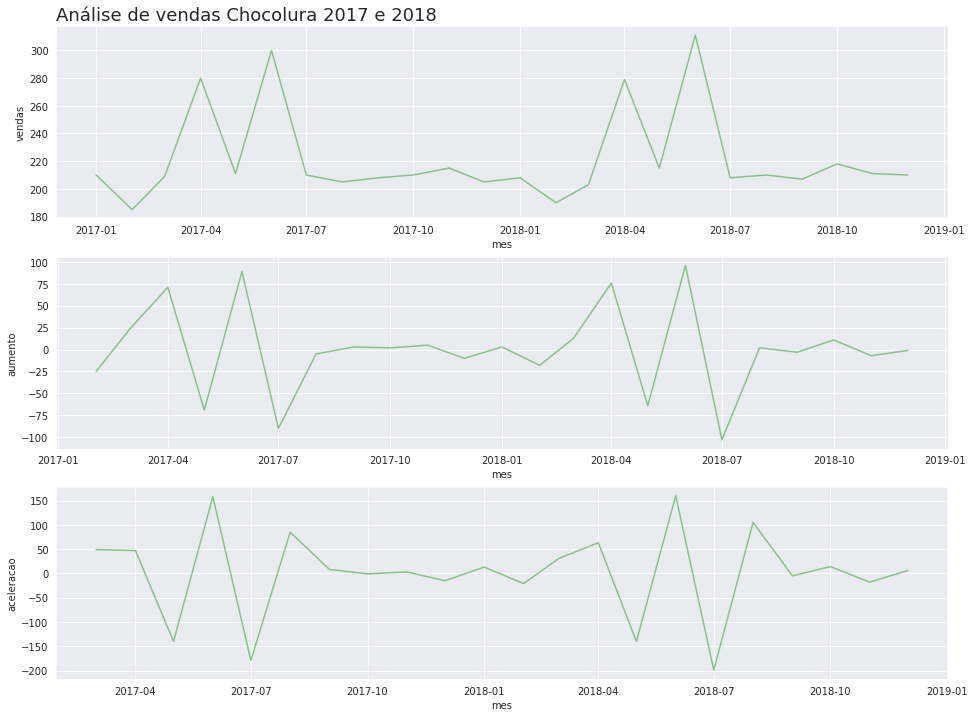

In [44]:
plot_comparacao('Análise de vendas Chocolura 2017 e 2018', 'mes', 'vendas', 'aumento','aceleracao', chocolura)

**Sazonalidade**:
Provavelmente ocasionda pelas datas comemorativas, neste caso, Páscoa e dia dos namorados respectivamente

# Chocolura - Vendas Diárias (Outubro e Novembro)

In [45]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [46]:
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [47]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos:  0


In [48]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [49]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


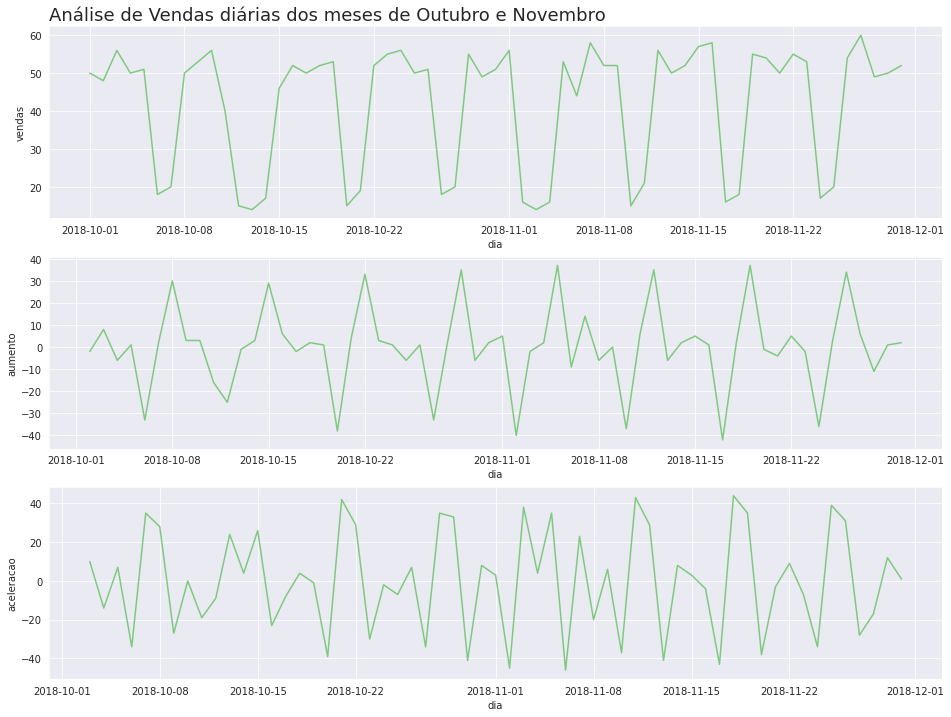

In [50]:
plot_comparacao('Análise de Vendas diárias dos meses de Outubro e Novembro', 'dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia)

### **Analisando a Sazonalidade**

In [51]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [52]:
vendas_por_dia.dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [53]:
dias_da_semana = {'Monday' :'Segunda', 
                  'Tuesday' : 'Terça', 
                  'Wednesday' : 'Quarta', 
                  'Thursday' : 'Quinta', 
                  'Friday' : 'Sexta', 
                  'Saturday' : 'Sábado',
       'Sunday' : 'Domingo'}

In [54]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_da_semana)
# ou vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(dias_da_semana)


In [55]:
vendas_por_dia.head(21)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


## Agrupando os dias

In [56]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [57]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


Podemos notar que as vendas despencam na chegada do final de semana (sexta apresenta uma leve baixa nas vendas e sábado uma grande baixa), assim causando a sazonalidade

**Correlação das Vemdas Diárias**

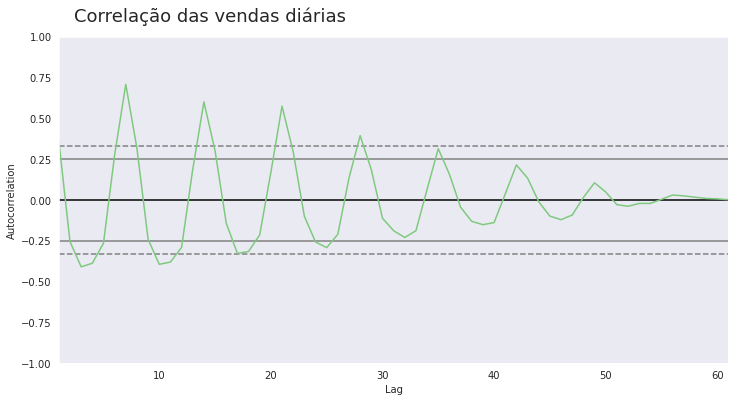

In [58]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

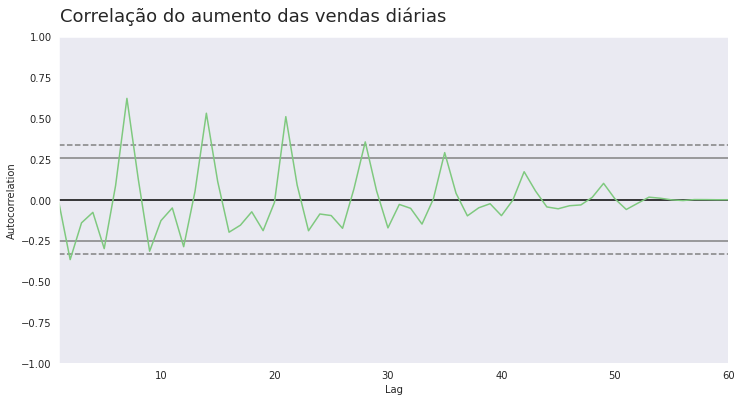

In [64]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize = 18, x = 0.35, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

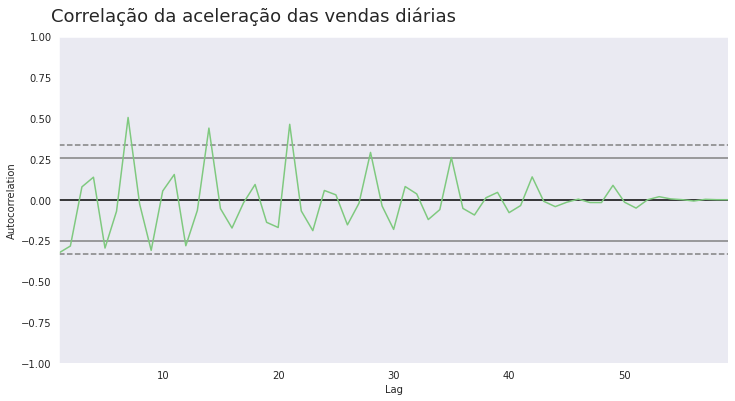

In [63]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize = 18, x = 0.35, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura Análise de Vendas

In [65]:
cafelura = pd.read_csv('cafelura.csv')

In [67]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [69]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [70]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [71]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [68]:
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [72]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


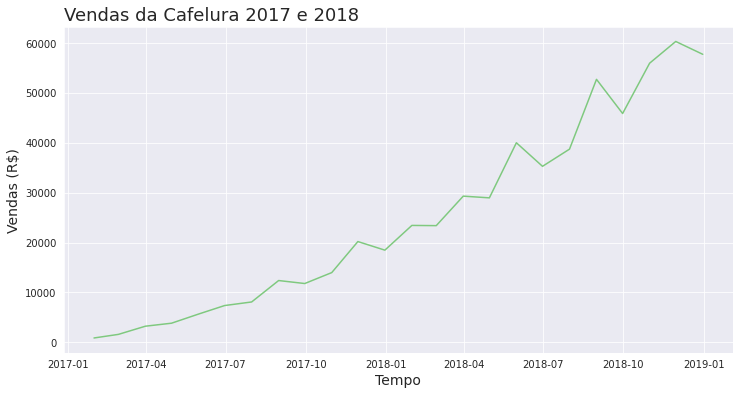

In [73]:
plotar('Vendas da Cafelura 2017 e 2018', 'Tempo', 'Vendas (R$)', 'mes', 'vendas', cafelura)

In [75]:
 qtde_de_dias_fds = pd.read_csv('dias_final_de_semana.csv') 
 qtde_de_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [76]:
qtde_de_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [77]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / qtde_de_dias_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


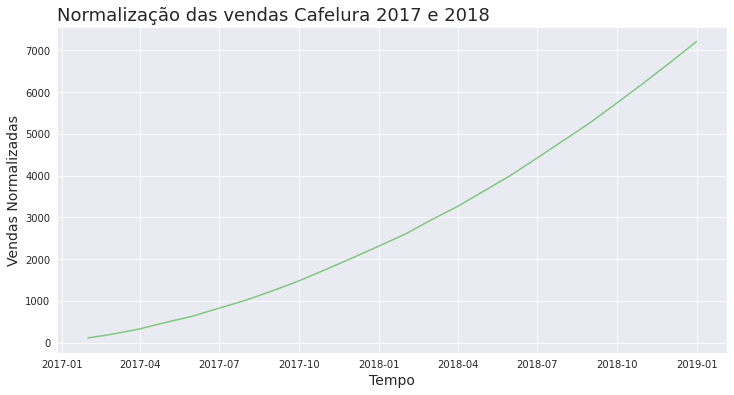

In [78]:
plotar('Normalização das vendas Cafelura 2017 e 2018','Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

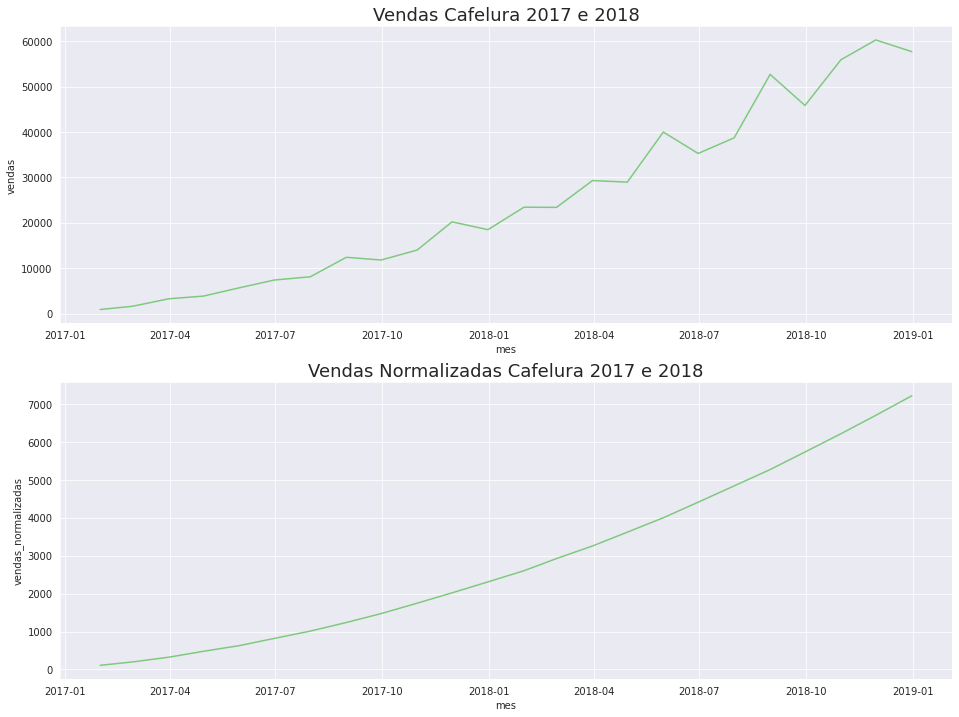

In [80]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)
ax = ax

# Statsmodel

In [81]:
 from statsmodels.tsa.seasonal import seasonal_decompose

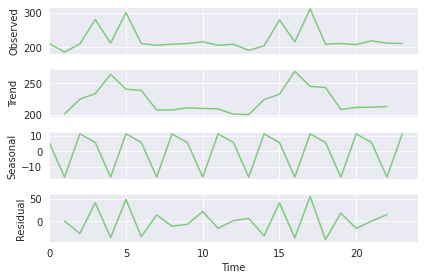

In [89]:
resultado = seasonal_decompose([chocolura['vendas']], freq = 3)
ax = resultado.plot()

In [90]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [91]:
data = ({
    'observacao' : observacao,
    'tendencia': tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


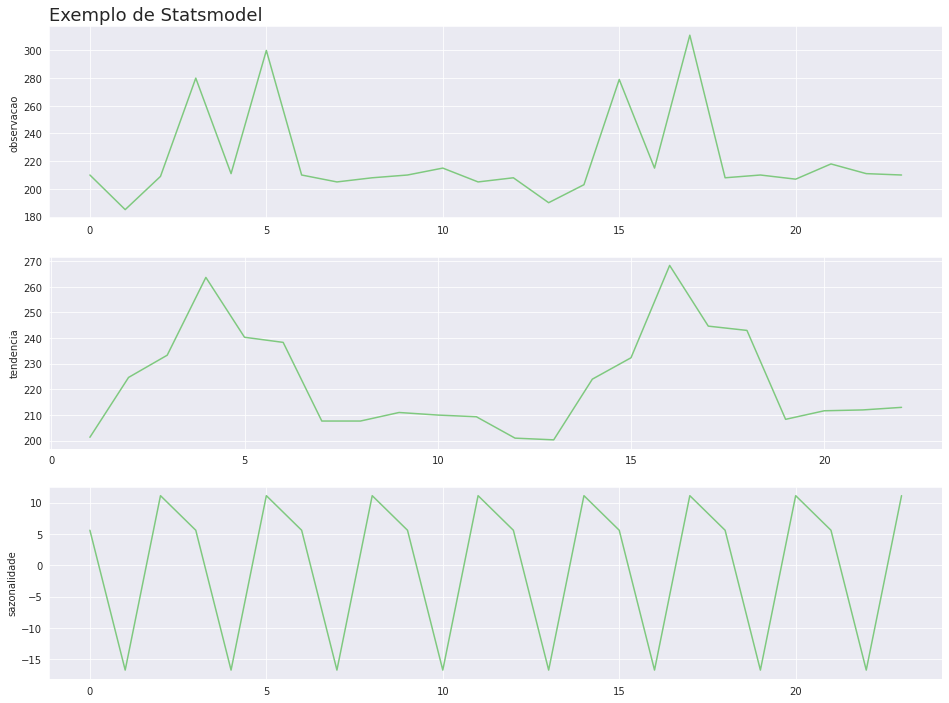

In [92]:
 plot_comparacao('Exemplo de Statsmodel', resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado)

# Alucel - Analise de Vendas

In [93]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [94]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [95]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [96]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [97]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


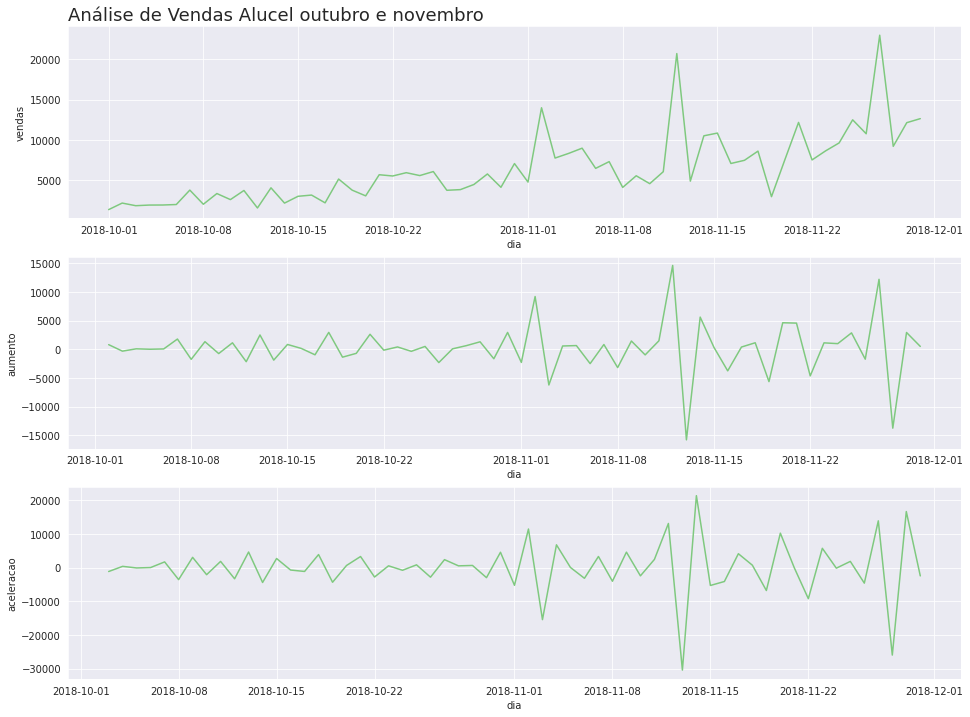

In [100]:
plot_comparacao('Análise de Vendas Alucel outubro e novembro', 'dia', 'vendas', 'aumento', 'aceleracao', alucel)

## Média Móvel

In [102]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


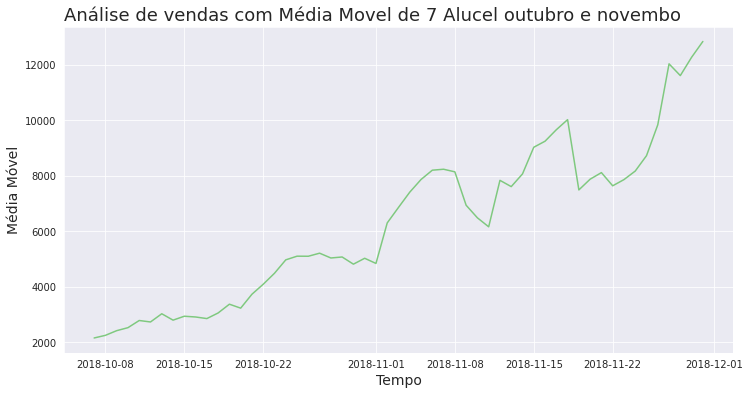

In [106]:
plotar('Análise de vendas com Média Movel de 7 Alucel outubro e novembo','Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [104]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

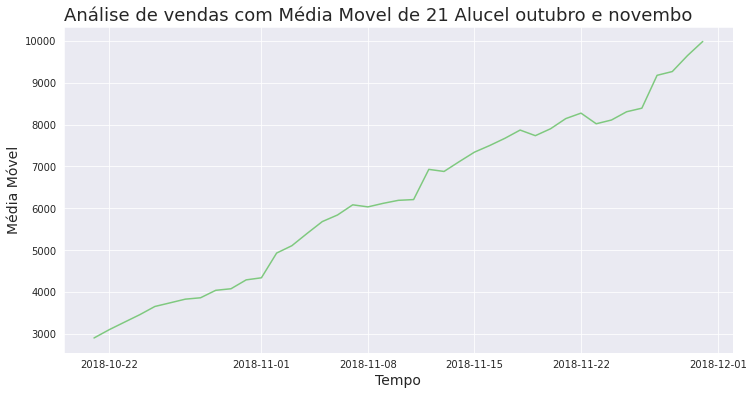

In [105]:
plotar('Análise de vendas com Média Movel de 21 Alucel outubro e novembo','Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

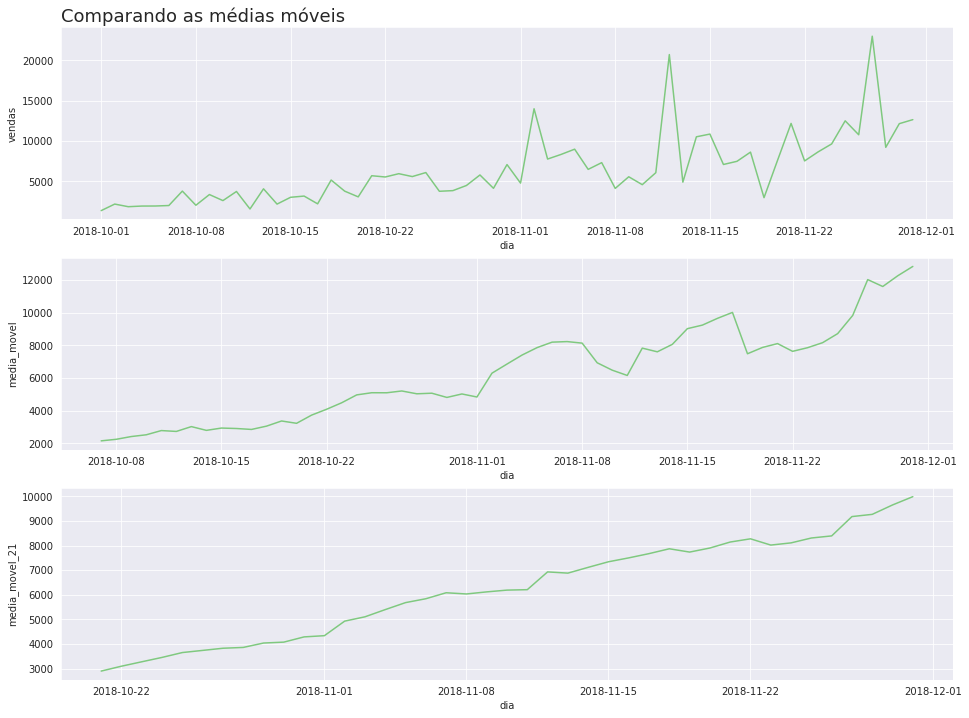

In [107]:
plot_comparacao('Comparando as médias móveis', 'dia', 'vendas', 'media_movel', 'media_movel_21', alucel)